In [8]:
import mysql.connector
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import matplotlib.animation as animation
#connect to mysql server with database baby_names
cnx = mysql.connector.connect(user='python', database='baby_names')
#create mysql cursor object
cur = cnx.cursor()

initialized variable. Total years: 138
created frequencies list.
created initial bar graph
Animating...


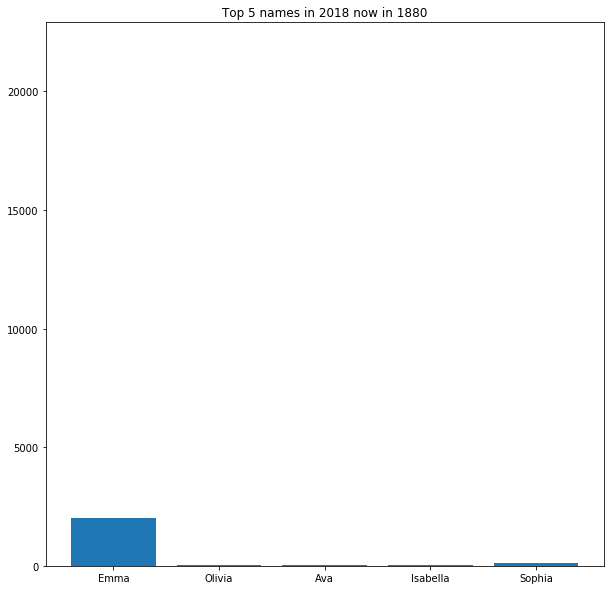

In [34]:
#new animation program with fixed names
#number of frames, also number of years
#how many names to select
#the program doesn't account for when names do not appear in the database for a given year (fixed below)
name_range = 5
#starting year
start_name_year = 2018
start_year = 1880
end_year = 2018
num_frames = end_year - start_year + 1
#end_year = start_year+num_frames-1
print("initialized variable. Total years: " + str(end_year - start_year))
query = "select name from baby where year = " + str(start_name_year)+ " and sex = 'f' order by year desc limit " + str(name_range) + " ;"
cur.execute(query)
names = [name[0] for name in cur.fetchall()]
frequencies = []
#frequencies[i][n] will by the number of people with name i in year n
for name in names:
    frequencies.append([])
    i = names.index(name)
    query = "select frequency from baby where name = '"+ name + "' and sex = 'f' and year between "+str(start_year)+" and " +str(end_year)+";"
    cur.execute(query)
    frequencies[i] += [frequency[0] for frequency in cur.fetchall()]
print("created frequencies list.")
fig=plt.figure(figsize = (10,10))

x_data = range(1,name_range+1)
plt.xticks(x_data, names)
#plot frequency list in start year
barcollection = plt.bar(x_data,[freq[0] for freq in frequencies])
#max_pop = max(max(frequency_list(year)) for year in range(1880,1880+n))
max_pop = max(max(freq) for freq in frequencies)
plt.ylim(top=max_pop)
print("created initial bar graph")
def animate(n):
    if n > num_frames-1:
        n = num_frames-1
    #name frequencies in year
    y_data = [freq[n] for freq in frequencies]
    #y_data=frequency_list(i+1880)
    plt.title("Top "+str(name_range)+" names in "+ str(start_name_year)+ " now in "+str(start_year+n))
    for i, b in enumerate(barcollection):
        b.set_height(y_data[i])
print("Animating...")
anim=animation.FuncAnimation(fig,animate,repeat=False,blit=False,frames=num_frames+20,
                             interval=100)
anim.save('animation.gif',writer='imagemagick')
plt.show()

In [39]:
#this part just creates the frequency dictionary 
#new animation program with fixed names
#number of frames, also number of years
#how many names to select
#trying to account for when names do not appear in the database for a given year
name_range = 10
#starting year
start_name_year = 1950
start_year = 1880
end_year = 2018
num_frames = end_year - start_year + 1
#end_year = start_year+num_frames-1
print("initialized variable. Total years: " + str(end_year - start_year))
query = "select name from baby where year = " + str(start_name_year)+ " and sex = 'f' order by year desc limit " + str(name_range) + " ;"
cur.execute(query)
names = [name[0] for name in cur.fetchall()]
frequencies = {}
#frequencies[name][year] will by the number of people with name name in year year
for name in names:
    frequencies[name] = {}
    #i = names.index(name)
    query = "select frequency, year from baby where name = '"+ name + "' and sex = 'f' and year between "+str(start_year)+" and " +str(end_year)+";"
    cur.execute(query)
    for frequency, year in cur.fetchall():
        frequencies[name][year]=frequency
print(frequencies['Linda'][1880])
#print(frequencies)
#print([frequencies[name][1880] for name in names])

initialized variable. Total years: 138
27


In [44]:
print([frequencies[name].get(1880,0) for name in names])
print(max([max(frequencies[name].values()) for name in names]))

[27, 7065, 0, 127, 286, 410, 12, 0, 7, 21]
99689


initialized variable. Total years: 138
created frequencies list.
created initial bar graph
Animating...


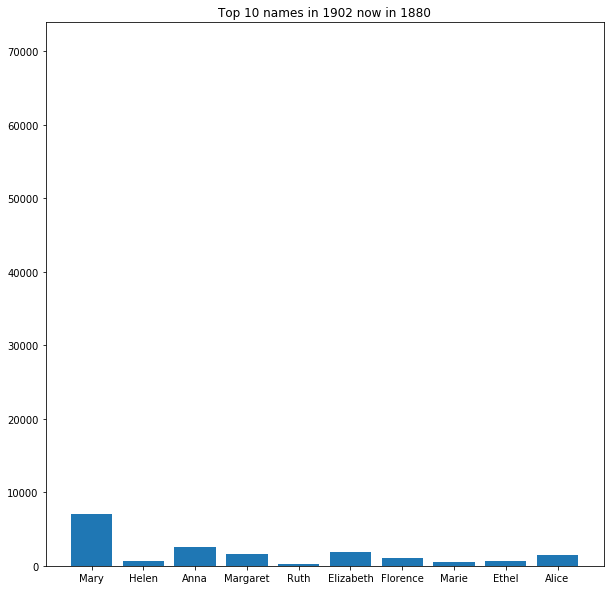

In [52]:
#new animation program with fixed names
#number of frames, also number of years
#how many names to select
#trying to account for when names do not appear in the database for a given year
name_range = 10
#starting year
start_name_year = 1902
start_year = 1880
end_year = 2018
num_frames = end_year - start_year + 1
#end_year = start_year+num_frames-1
print("initialized variable. Total years: " + str(end_year - start_year))
#query mysql for the top female names in year 'start_name_year'
query = "select name from baby where year = " + str(start_name_year)+ " and sex = 'f' order by year desc limit " + str(name_range) + " ;"
cur.execute(query)
names = [name[0] for name in cur.fetchall()]
#create frequencies as empty dictionary 
frequencies = {}
#frequencies[name][year] will by the number of people with name name in year year
for name in names:
    #new dictionary for each name
    frequencies[name] = {}
    #query for the frequency data for all years
    query = "select frequency, year from baby where name = '"+ name + "' and sex = 'f' and year between "+str(start_year)+" and " +str(end_year)+";"
    cur.execute(query)
    #define the dictionary entry
    for frequency, year in cur.fetchall():
        frequencies[name][year]=frequency
print("created frequencies list.")

#make a figure for the graph to go on 
fig=plt.figure(figsize = (10,10))

#list of numbers from 1 to the name range
#make tick marks labeled by the names
x_data = range(1,name_range+1)
plt.xticks(x_data, names)
#plot frequency list in start year 1880
# the [frequencies[name].get(1880,0) for name in names] lists 0 if 1880 is not in the dictionary 
# frequencies[name]
barcollection = plt.bar(x_data,[frequencies[name].get(1880,0) for name in names])
#find the maximum frequency of all the data
max_pop = max([max(frequencies[name].values()) for name in names])
#set the y-axis to be the maximum height
plt.ylim(top=max_pop)
print("created initial bar graph")
def animate(n):
    #pause at end of animation
    if n > num_frames-1:
        n = num_frames-1
    #name frequencies in year 1880+n as a list
    y_data = [frequencies[name].get(1880+n,0) for name in names]
    #adjust the title to reflect current year
    plt.title("Top "+str(name_range)+" names in "+ str(start_name_year)+ " now in "+str(start_year+n))
    #adjust bar heights
    for i, b in enumerate(barcollection):
        b.set_height(y_data[i])
print("Animating...")
#make the animation
anim=animation.FuncAnimation(fig,animate,repeat=False,blit=False,frames=num_frames+20,
                             interval=200)
#save the animation
anim.save(str(start_name_year)+'_names.gif',writer='imagemagick')
#plt.show()

<img src = "1950_names.gif">

<img src='2018_names.gif'>

<img src='1902_names.gif'>